<a href="https://colab.research.google.com/github/Denzel-05/demo-repo/blob/main/notebook014d40120a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'new-york-city-airbnb-open-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F268833%2F611395%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240203%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240203T225134Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db28a55f44334554957d0702c893aceb73648cfcc5ad61e37e6b94d9762f42abcaff9ab3ef44fd77a73d1a19545c4cbcc236d38c66403e914b22405973d0d8ee1c646885591946e6ba2e75a750bb4e1fc6a4d53e3f4fe4892b7be65a799cb4afd80818c1ba4bd9baad847f411958eaf53a3b9d44e106a23e0666f02e14faa2fce9d01fbe109bd2445fadb2765afc97f136ddd92cf513761ed7350e02963d7748ad116d7de0964453f9a9891968609a3679fb33b725c4c45d6f1fb6a7ae1678cc88dbd75f9bbcc2422c8df38f5202c6eac4f3fe7ac36f7730638d0c2bbe1c091fc00451dc6d22cccf3507369b1b31926914afdaa9faab0482628dd183860620d84'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2562692 bytes downloaded
Downloaded and uncompressed: new-york-city-airbnb-open-data
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [31]:
import pandas as pd
import numpy as np



In [8]:
df= pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of           id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  lon

range = str(np.ptp(df['price']))
std = np.std(df['price'])
median = np.median(df['price'])
print(range,   std,    median )

In [10]:
df.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [30]:
range = str(np.ptp(df['price']))
std = np.std(df['price'])
median = np.median(df['price'])
print( range,   std,    median )

10000 240.15171391941718 106.0


(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

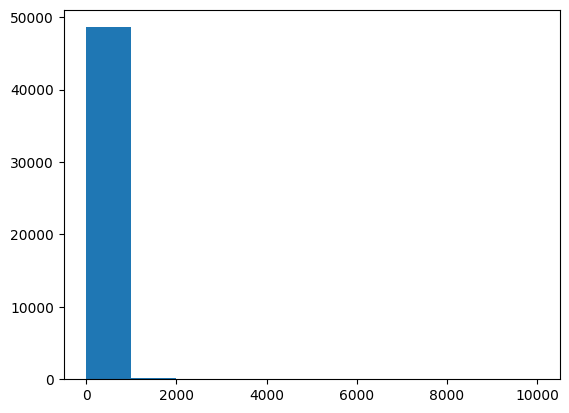

In [32]:
from matplotlib import pyplot as plt
plt.hist(df['price'])

<Axes: xlabel='price', ylabel='Count'>

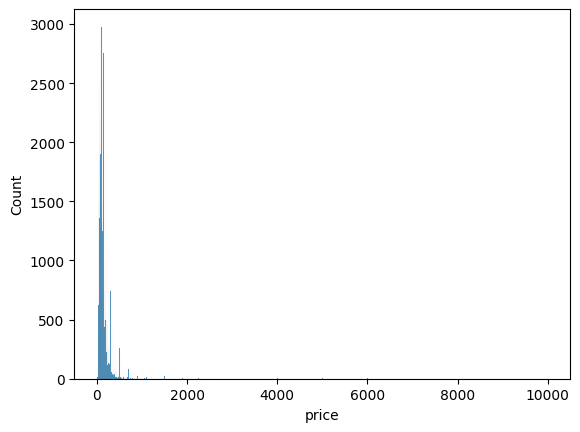

In [33]:
import seaborn as sns
sns.histplot(df['price'])

In [ ]:
# prompt: what do the do above codes do

import matplotlib.pyplot as plt
import numpy as np
The code snippet you provided imports the New York City Airbnb Open Data dataset from Kaggle and performs some basic exploratory data analysis.

Here's a breakdown of what each part of the code does:

1. **Import Libraries**:

The code starts by importing several Python libraries, including `os`, `sys`, `tempfile`, `urllib.request`, `urllib.parse`, `urllib.error`, `zipfile`, `tarfile`, `shutil`, `numpy`, and `pandas`. These libraries are used for various tasks such as file handling, data manipulation, and data visualization.

2. **Configure Kaggle Environment**:

The code then sets up the Kaggle environment by creating symbolic links to the input and working directories. This allows the notebook to access the data files stored in the Kaggle dataset.

3. **Download and Extract Data**:

The code iterates through a list of data sources (in this case, only one: "new-york-city-airbnb-open-data") and downloads the associated files. The downloaded files are then extracted from the ZIP or TAR archives into the appropriate directory.

4. **Import Data into Pandas**:

The code uses the `pandas.read_csv()` function to import the Airbnb data from the downloaded CSV file into a Pandas DataFrame called `df`.

5. **Data Exploration**:

The code performs some basic data exploration on the DataFrame `df`:

- `df.info()`: Prints information about the DataFrame, including the number of rows and columns, data types, and memory usage.
- `df.isnull().sum()`: Counts the number of missing values in each column.
- `range = str(np.ptp(df['price']))`: Calculates the range (difference between the maximum and minimum values) of the `price` column.
- `std = np.std(df['price'])`: Calculates the standard deviation of the `price` column.
- `median = np.median(df['price'])`: Calculates the median value of the `price` column.
- `print(range, std, median)`: Prints the calculated range, standard deviation, and median of the `price` column.
- `plt.hist(df['price'])`: Creates a histogram of the `price` column using matplotlib.
- `sns.histplot(df['price'])`: Creates another histogram of the `price` column using Seaborn.

These steps provide a basic understanding of the Airbnb data and its characteristics, such as the distribution of prices, the presence of missing values, and the overall data structure.

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

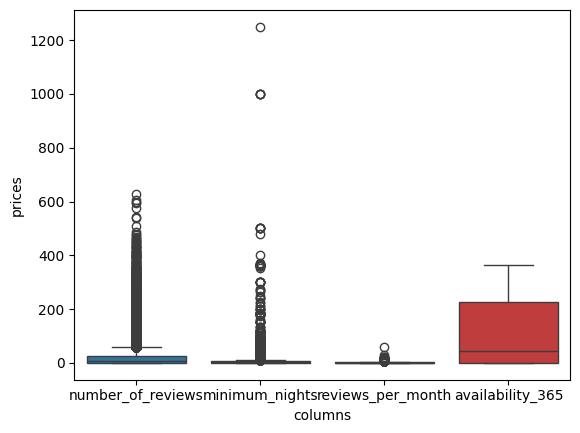

In [44]:
columns = ['number_of_reviews','minimum_nights','reviews_per_month','availability_365','neighbourhood_group']
sns.boxplot(data= df[columns])
plt.xlabel('columns')
plt.ylabel('prices')
plt.show()

In [50]:
df['price'].max()



10000

In [51]:
df['price'].min()

0

In [59]:
# prompt: calculate correlation coeficient

corr_price = corr_matrix[['price','reviews_per_month']]
print(corr_price)


                                   price  reviews_per_month
id                              0.010619           0.291828
host_id                         0.015309           0.296417
latitude                        0.033939          -0.010142
longitude                      -0.150019           0.145948
price                           1.000000          -0.030608
minimum_nights                  0.042799          -0.121702
number_of_reviews              -0.047954           0.549868
reviews_per_month              -0.030608           1.000000
calculated_host_listings_count  0.057472          -0.009421
availability_365                0.081829           0.185791


In [60]:
corr_price = corr_matrix[['price','minimum_nights']]
print(corr_price)


                                   price  minimum_nights
id                              0.010619       -0.013224
host_id                         0.015309       -0.017364
latitude                        0.033939        0.024869
longitude                      -0.150019       -0.062747
price                           1.000000        0.042799
minimum_nights                  0.042799        1.000000
number_of_reviews              -0.047954       -0.080116
reviews_per_month              -0.030608       -0.121702
calculated_host_listings_count  0.057472        0.127960
availability_365                0.081829        0.144303


In [61]:
corr_price = corr_matrix[['number_of_reviews','availability_365']]
print(corr_price)


                                number_of_reviews  availability_365
id                                      -0.319760          0.085468
host_id                                 -0.140106          0.203492
latitude                                -0.015389         -0.010983
longitude                                0.059094          0.082731
price                                   -0.047954          0.081829
minimum_nights                          -0.080116          0.144303
number_of_reviews                        1.000000          0.172028
reviews_per_month                        0.549868          0.185791
calculated_host_listings_count          -0.072376          0.225701
availability_365                         0.172028          1.000000
